

# **Stable Diffusion** 🎨
*...usando `🧨diffusers`*

Stable Diffusion es un modelo de difusión latente de texto a imagen creado por los investigadores e ingenieros de [CompVis](https://github.com/CompVis), [Stability AI](https://stability.ai/) y [LAION](https://laion.ai/). Está entrenado en imágenes de 512x512 de un subconjunto de la base de datos [LAION-5B](https://laion.ai/blog/laion-5b/). Este modelo usa un codificador de texto CLIP ViT-L/14 congelado para condicionar el modelo con indicaciones de texto. Con sus 860M de UNet y 123M de codificador de texto, el modelo es relativamente liviano y puede funcionar en muchas GPUs de consumo.
Ve la [tarjeta del modelo](https://huggingface.co/CompVis/stable-diffusion) para más información.

Este notebook de Colab muestra cómo usar Stable Diffusion con la biblioteca [🧨 Diffusers](https://github.com/huggingface/diffusers) de 🤗 Hugging Face.

¡Vamos a empezar!

## 1. Cómo usar `StableDiffusionPipeline`

Antes de meternos en los aspectos teóricos de cómo funciona Stable Diffusion, probémoslo un poco 🤗.

En esta sección, te mostramos cómo podés ejecutar la inferencia de texto a imagen en solo unas pocas líneas de código.

### Configuración

Primero, asegurate de que estás usando un entorno de ejecución con GPU para correr este notebook, así la inferencia es mucho más rápida. Si el siguiente comando falla, usá el menú `Runtime` de arriba y seleccioná `Change runtime type`.

In [56]:
!nvidia-smi

Fri Jul 26 20:06:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0              30W /  70W |  11913MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--



A continuación, deberías instalar `diffusers` así como también `scipy`, `ftfy` y `transformers`. `accelerate` se usa para lograr una carga mucho más rápida.

In [ ]:
!pip install "jax[cuda12_local]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

### Pipeline de Stable Diffusion

`StableDiffusionPipeline` es un pipeline de inferencia de extremo a extremo que podés usar para generar imágenes a partir de texto con solo unas pocas líneas de código.

Primero, cargamos los pesos pre-entrenados de todos los componentes del modelo. En este notebook usamos la versión 1.4 de Stable Diffusion ([CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4)), pero hay otras variantes que podés querer probar:
* [runwayml/stable-diffusion-v1-5](https://huggingface.co/runwayml/stable-diffusion-v1-5)
* [stabilityai/stable-diffusion-2-1-base](https://huggingface.co/stabilityai/stable-diffusion-2-1-base)
* [stabilityai/stable-diffusion-2-1](https://huggingface.co/stabilityai/stable-diffusion-2-1). Esta versión puede producir imágenes con una resolución de 768x768, mientras que las otras funcionan a 512x512.

Además del id del modelo [CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4), también estamos pasando una `revision` específica y `torch_dtype` al método `from_pretrained`.

Queremos asegurarnos de que cualquier Google Colab gratuito pueda ejecutar Stable Diffusion, por eso estamos cargando los pesos de la rama de media precisión [`fp16`](https://huggingface.co/CompVis/stable-diffusion-v1-4/tree/fp16) y también indicamos a `diffusers` que espere los pesos en precisión float16 pasando `torch_dtype=torch.float16`.

Si querés asegurarte de tener la mayor precisión posible, asegurate de quitar `torch_dtype=torch.float16` a costa de un mayor uso de memoria.

In [ ]:
import numpy as np

a = np.array([0.123456789121212,2,3], dtype=np.float16)
print("16bit: ", a[0])

a = np.array([0.123456789121212,2,3], dtype=np.float32)
print("32bit: ", a[0])

b = np.array([0.123456789121212121212,2,3], dtype=np.float64)
print("64bit: ", b[0])

16bit:  0.1235
32bit:  0.12345679
64bit:  0.12345678912121212


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

safety_checker/pytorch_model.fp16.safetensors not found


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.non_ema.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

(…)fusion_pytorch_model.non_ema.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


A continuación, movamos el pipeline a la GPU para tener una inferencia más rápida.

In [ ]:
pipe = pipe.to("cuda")

Y estamos listos para generar imágenes:

  0%|          | 0/50 [00:00<?, ?it/s]

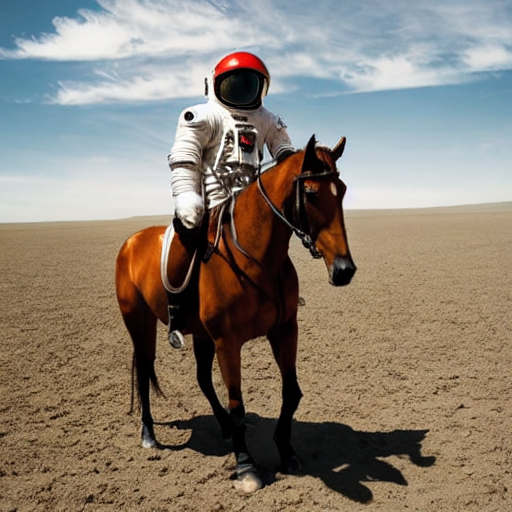

In [66]:
prompt = "a photograph of an astronaut riding a horse"
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can either save it such as:
image.save(f"astronaut_rides_horse.png")

# or if you're in a google colab you can directly display it with
image

Ejecutar la celda anterior varias veces te dará una imagen diferente cada vez. Si querés un resultado determinístico, podés pasar una semilla aleatoria al pipeline. Cada vez que uses la misma semilla obtendrás el mismo resultado de imagen.

  0%|          | 0/50 [00:00<?, ?it/s]

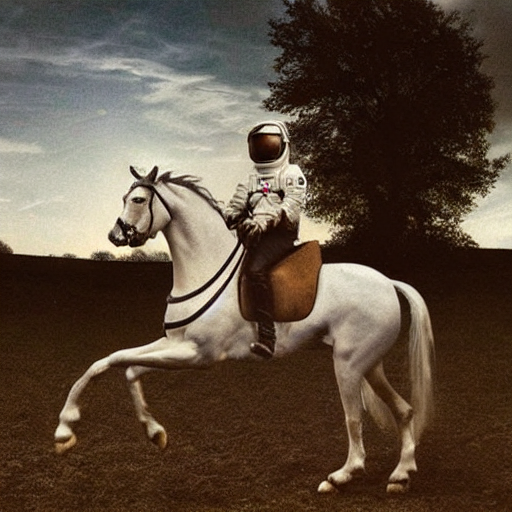

In [63]:
import torch

generator = torch.Generator("cuda").manual_seed(1000)

image = pipe(prompt, generator=generator).images[0]

image

Podés cambiar el número de pasos de inferencia usando el argumento `num_inference_steps`. En general, los resultados son mejores cuantos más pasos uses. Stable Diffusion, siendo uno de los modelos más recientes, funciona muy bien con un número relativamente pequeño de pasos, por lo que recomendamos usar el valor predeterminado de `50`. Si querés resultados más rápidos, podés usar un número menor.

La siguiente celda usa la misma semilla que antes, pero con menos pasos. Notá cómo algunos detalles, como la cabeza del caballo o el casco, son menos realistas y menos definidos que en la imagen anterior:

  0%|          | 0/35 [00:00<?, ?it/s]

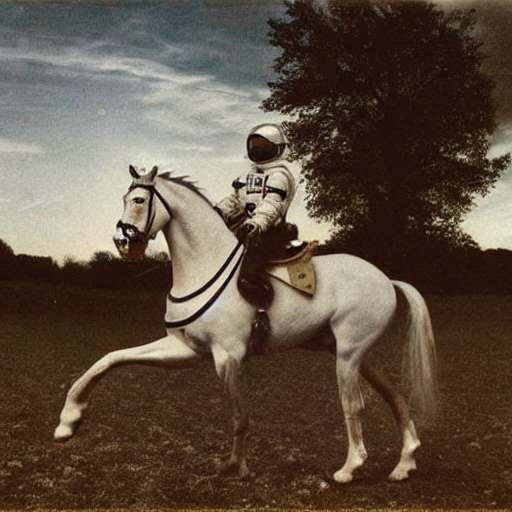

In [65]:
import torch

generator = torch.Generator("cuda").manual_seed(1000)

image = pipe(prompt, num_inference_steps=35, generator=generator).images[0]

image

El otro parámetro en la llamada al pipeline es `guidance_scale`. Es una forma de aumentar la adherencia a la señal condicional que en este caso es el texto, así como la calidad general de la muestra. En términos simples, la guía libre de clasificador fuerza a la generación a coincidir mejor con la indicación. Números como `7` o `8.5` dan buenos resultados, si usás un número muy grande las imágenes pueden verse bien, pero serán menos diversas.

Podés aprender sobre los detalles técnicos de este parámetro en [la última sección](https://colab.research.google.com/drive/1ALXuCM5iNnJDNW5vqBm5lCtUQtZJHN2f?authuser=1#scrollTo=UZp-ynZLrS-S) de este notebook.

Para generar múltiples imágenes con la misma indicación, simplemente usamos una lista con la misma indicación repetida varias veces. Le enviaremos la lista al pipeline en lugar de la cadena de texto que usamos antes.

Primero, escribamos una función auxiliar para mostrar una cuadrícula de imágenes. Simplemente ejecutá la siguiente celda para crear la función `image_grid`, o revelá el código si te interesa saber cómo se hace.

In [67]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

Now, we can generate a grid image once having run the pipeline with a list of 3 prompts.

  0%|          | 0/50 [00:00<?, ?it/s]

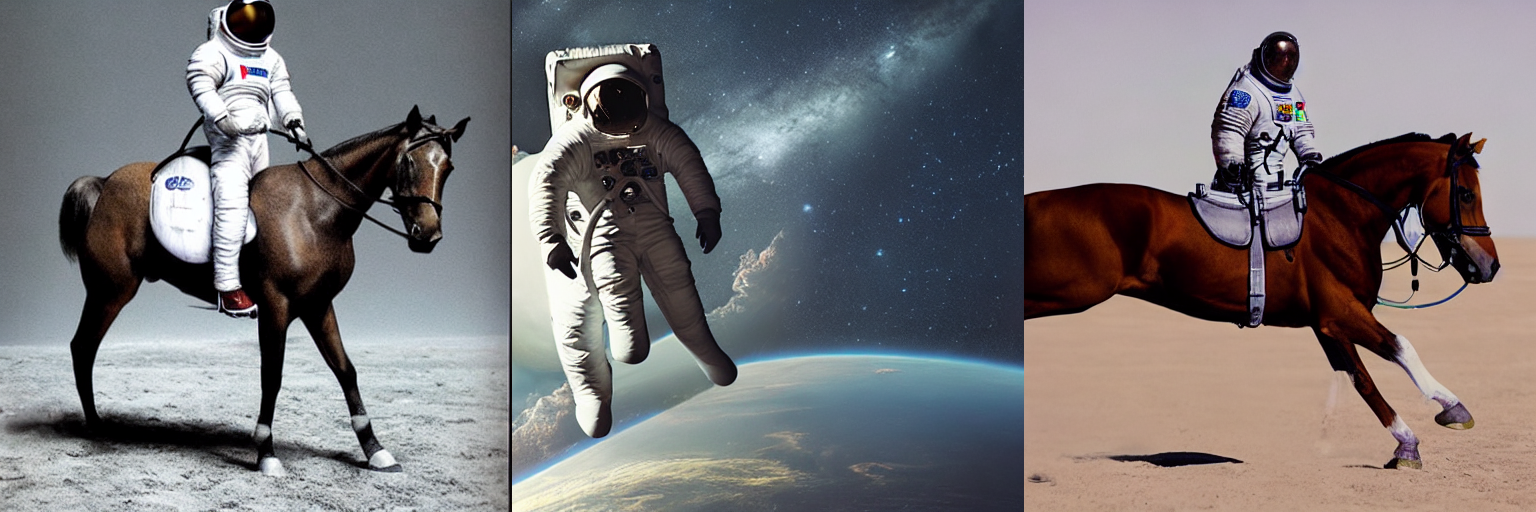

In [68]:
num_images = 3
prompt = ["a photograph of an astronaut riding a horse"] * num_images

images = pipe(prompt).images

grid = image_grid(images, rows=1, cols=3)
grid

Y aquí está cómo generar una cuadrícula de imágenes de `n × m`.

In [ ]:
num_cols = 3
num_rows = 4

prompt = ["a photograph of an astronaut riding a horse"] * num_cols

all_images = []
for i in range(num_rows):
  images = pipe(prompt).images
  all_images.extend(images)

grid = image_grid(all_images, rows=num_rows, cols=num_cols)
grid

Output hidden; open in https://colab.research.google.com to view.

### Generar imágenes no cuadradas

Stable Diffusion produce imágenes de `512 × 512` píxeles por defecto. Pero es muy fácil sobreescribir el valor predeterminado usando los argumentos `height` y `width`, así podés crear imágenes rectangulares en proporciones de retrato o paisaje.

Estas son algunas recomendaciones para elegir buenos tamaños de imagen:
- Asegurate de que `height` y `width` sean ambos múltiplos de `8`.
- Ir por debajo de 512 podría resultar en imágenes de menor calidad.
- Ir por encima de 512 en ambas direcciones repetirá áreas de la imagen (se pierde la coherencia global).
- La mejor manera de crear imágenes no cuadradas es usar `512` en una dimensión, y un valor mayor en la otra.

  0%|          | 0/50 [00:00<?, ?it/s]

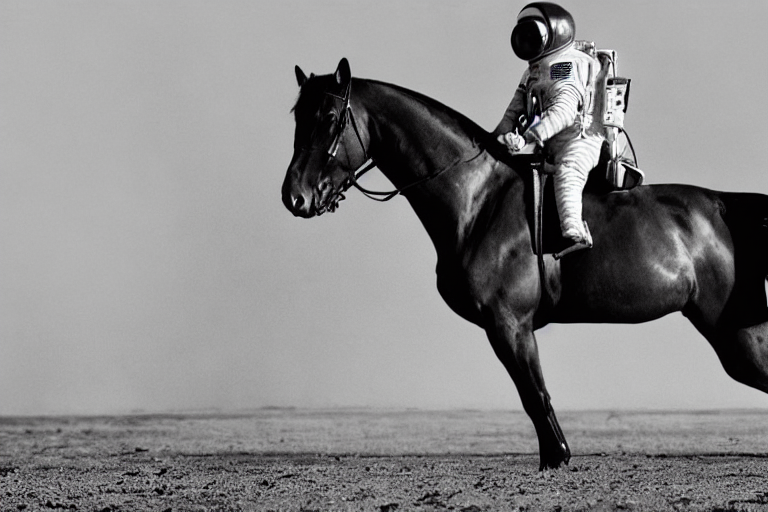

In [ ]:
prompt = "a photograph of an astronaut riding a horse"

image = pipe(prompt, height=512, width=768).images[0]
image

## 2. Qué es Stable Diffusion

Ahora, entremos en la parte teórica de Stable Diffusion 👩‍🎓.

Stable Diffusion se basa en un tipo particular de modelo de difusión llamado **Difusión Latente**, propuesto en [High-Resolution Image Synthesis with Latent Diffusion Models](https://arxiv.org/abs/2112.10752).



Los modelos de difusión generales son sistemas de aprendizaje automático que se entrenan para *desenfocar* paso a paso el ruido gaussiano aleatorio, hasta llegar a una muestra de interés, como una *imagen*. Para una visión más detallada de cómo funcionan, revisá [este colab](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/diffusers_intro.ipynb).

Los modelos de difusión han demostrado alcanzar resultados de vanguardia en la generación de datos de imagen. Pero una desventaja de los modelos de difusión es que el proceso de difusión inversa es lento. Además, estos modelos consumen mucha memoria porque operan en el espacio de píxeles, lo cual se vuelve extremadamente costoso al generar imágenes de alta resolución. Por lo tanto, es un desafío entrenar estos modelos y también usarlos para inferencia.

La difusión latente puede reducir la complejidad de la memoria y el cálculo al aplicar el proceso de difusión sobre un espacio _latente_ de menor dimensión, en lugar de usar el espacio de píxeles real. Esta es la diferencia clave entre los modelos de difusión estándar y los modelos de difusión latente: **en la difusión latente, el modelo se entrena para generar representaciones latentes (comprimidas) de las imágenes.**

Hay tres componentes principales en la difusión latente.

1. Un autoencoder de imágenes. (VAE)
2. Una [U-Net](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/diffusers_intro.ipynb#scrollTo=wW8o1Wp0zRkq).
3. Un encoder de texto, *por ejemplo,* [CLIP's Text Encoder](https://huggingface.co/docs/transformers/model_doc/clip#transformers.CLIPTextModel).

![](https://tinyurl.com/275qh4lk)

**1. El autoencoder (VAE)**

El modelo VAE tiene dos partes, un codificador y un decodificador. El codificador se usa para convertir la imagen en una representación latente de baja dimensión, que servirá como entrada al modelo *U-Net*. El decodificador, por el contrario, transforma la representación latente de nuevo en una imagen.

Durante el _entrenamiento_ de la difusión latente, el codificador se usa para obtener las representaciones latentes (_latents_) de las imágenes para el proceso de difusión directa, que aplica más y más ruido en cada paso. Durante la _inferencia_, los latentes desenfocados generados por el proceso de difusión inversa se convierten de nuevo en imágenes usando el decodificador VAE. Como veremos, durante la inferencia **solo necesitamos el decodificador VAE**.

**2. La U-Net**

La U-Net tiene una parte de encoder y una parte de decoder, ambas compuestas por bloques ResNet. El encoder comprime una representación de imagen en una representación de menor resolución, y el decoder decodifica la representación  de menor resolución de nuevo a la representación de mayor resolución original que supuestamente es menos ruidosa. Más específicamente, la salida de la U-Net predice el residuo de ruido, que se puede usar para calcular la representación de la imagen desenfocada predicha.

Para evitar que la U-Net pierda información importante mientras reduce la resolución, generalmente se añaden conexiones residuales entre los bloques downsampling del encoder y los de upsampling del decoder. Además, la U-Net de stable diffusion es capaz de condicionar su salida a los embeddings de texto a través de capas de atención cruzada. Las capas de atención cruzada se añaden tanto a la parte del encoder como a la del decoder de la U-Net, generalmente entre los bloques ResNet.

**3. El Text-encoder**

El text-encoder es responsable de transformar la indicación de entrada, *por ejemplo,* "Un astronauta montando un caballo" en un espacio de embeddings que pueda ser entendido por la U-Net. Generalmente es un encoder simple basado en *transformer* que mapea una secuencia de tokens de entrada a una secuencia de embeddings latentes de texto.

Inspirado por [Imagen](https://imagen.research.google/), Stable Diffusion **no** entrena el text-encoder durante el entrenamiento y simplemente usa un text-encoder de CLIP ya entrenado, [CLIPTextModel](https://huggingface.co/docs/transformers/model_doc/clip#transformers.CLIPTextModel).

**¿Por qué la difusión latente es rápida y eficiente?**

Dado que la U-Net de los modelos de difusión latente opera en un espacio de baja dimensión, reduce en gran medida los requisitos de memoria y cómputo en comparación con los modelos de difusión en el espacio de píxeles. Por ejemplo, el autoencoder usado en Stable Diffusion tiene un factor de reducción de 8. Esto significa que una imagen de forma `(3, 512, 512)` se convierte en `(3, 64, 64)` en el espacio latente, lo que requiere `8 × 8 = 64` veces menos memoria.

¡Es por esto que es posible generar imágenes de `512 × 512` tan rápidamente, incluso en GPUs de 16GB en Colab!

**Stable Diffusion durante la inferencia**

Juntando todo, ahora veamos más de cerca cómo funciona el modelo en la inferencia ilustrando el flujo lógico.


<p align="left">
<img src="https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/stable_diffusion.png" alt="sd-pipeline" width="500"/>
</p>

El modelo de stable diffusion toma tanto una semilla latente como una indicación de texto como entrada. La semilla latente se usa para generar representaciones de imágenes latentes aleatorias de tamaño $64 \times 64$, mientras que la indicación de texto se transforma en embeddings de texto de tamaño $77 \times 768$ a través del text encoder de CLIP.

Luego, la U-Net *desenfoca* iterativamente las representaciones de imágenes latentes aleatorias mientras está condicionada por los embeddings de texto. La salida de la U-Net, siendo el residuo de ruido, se usa para calcular una representación de imagen latente desenfocada a través de un algoritmo de scheduler. Se pueden usar muchos algoritmos de scheduler diferentes para este cálculo, cada uno con sus pros y contras. Para Stable Diffusion, recomendamos usar uno de los siguientes:

- [Scheduler PNDM](https://github.com/huggingface/diffusers/blob/main/src/diffusers/schedulers/scheduling_pndm.py) (usado por defecto).
- [Scheduler K-LMS](https://github.com/huggingface/diffusers/blob/main/src/diffusers/schedulers/scheduling_lms_discrete.py).
- [Scheduler Heun Discrete](https://github.com/huggingface/diffusers/blob/main/src/diffusers/schedulers/scheduling_heun_discrete.py).
- [Scheduler DPM Solver Multistep](https://github.com/huggingface/diffusers/blob/main/src/diffusers/schedulers/scheduling_dpmsolver_multistep.py). Este scheduler puede lograr una gran calidad en menos pasos. ¡Podés probar con 25 en lugar de los 50 por defecto!

El proceso de *difusión* se repite aproximadamente 50 veces para recuperar paso a paso mejores representaciones de imágenes latentes.
Una vez completo, la representación de imagen latente es decodificada por la parte del decoder del autoencoder variacional.


Después de esta breve introducción a la Difusión Latente y Stable Diffusion, ¡veamos cómo hacer un uso avanzado de 🤗 Hugging Face Diffusers!

## 3. Cómo escribir tu propio pipeline de inferencia con `diffusers`

Finalmente, mostramos cómo podés crear pipelines de difusión personalizados con `diffusers`. Esto es a menudo muy útil para profundizar un poco más en ciertas funcionalidades del sistema y para potencialmente intercambiar ciertos componentes.

En esta sección, demostraremos cómo usar Stable Diffusion con un scheduler diferente, específicamente el scheduler K-LMS de [Katherine Crowson](https://github.com/crowsonkb) que se añadió en [este PR](https://github.com/huggingface/diffusers/pull/185#pullrequestreview-1074247365).

Repasemos el `StableDiffusionPipeline` paso a paso para ver cómo podríamos haberlo escrito nosotros mismos.

Comenzaremos cargando los modelos individuales involucrados.

In [ ]:
import torch
torch_device = "cuda" if torch.cuda.is_available() else "cpu"

El [modelo preentrenado](https://huggingface.co/CompVis/stable-diffusion-v1-3-diffusers/tree/main) incluye todos los componentes necesarios para configurar un pipeline de difusión completo. Están almacenados en las siguientes carpetas:
- `text_encoder`: Stable Diffusion usa CLIP, pero otros modelos de difusión pueden usar otros encoders como `BERT`.
- `tokenizer`: Debe coincidir con el que usa el modelo `text_encoder`.
- `scheduler`: El algoritmo de programación utilizado para añadir ruido progresivamente a la imagen durante el entrenamiento.
- `unet`: El modelo utilizado para generar la representación latente de la entrada.
- `vae`: Módulo de autoencoder que usaremos para decodificar las representaciones latentes en imágenes reales.

Podemos cargar los componentes haciendo referencia a la carpeta en la que fueron guardados, usando el argumento `subfolder` en `from_pretrained`.

In [ ]:
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, PNDMScheduler

# 1. Load the autoencoder model which will be used to decode the latents into image space.
vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")

# 2. Load the tokenizer and text encoder to tokenize and encode the text.
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")

# 3. The UNet model for generating the latents.
unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet")

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


Ahora, en lugar de cargar el scheduler predefinido, usaremos el scheduler K-LMS.

In [ ]:
from diffusers import LMSDiscreteScheduler

scheduler = LMSDiscreteScheduler.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="scheduler")

Movemos los modelos a la GPU

In [ ]:
vae = vae.to(torch_device)
text_encoder = text_encoder.to(torch_device)
unet = unet.to(torch_device)

Ahora definimos los parámetros que usaremos para generar imágenes.

El parámetro `guidance_scale` se utiliza para ajustar el grado de adherencia del modelo a la indicación de texto. Cuando `guidance_scale` es igual a 1, no se aplica guía sin clasificador, es decir, el modelo no se esfuerza por adherirse más estrictamente a la indicación de texto. Sin embargo, al aumentar este valor, como por ejemplo a 7.5 (que es lo que usamos aquí), se incrementa la influencia de la indicación de texto sobre el proceso de generación, resultando en imágenes que coinciden mejor con la descripción proporcionada.

A diferencia de los ejemplos anteriores, configuramos `num_inference_steps` en 100 para obtener una imagen aún más definida.

In [ ]:
prompt = ["a photograph of an astronaut riding a horse"]

height = 512                        # default height of Stable Diffusion
width = 512                         # default width of Stable Diffusion

num_inference_steps = 100            # Number of denoising steps

guidance_scale = 7.5                # Scale for classifier-free guidance

generator = torch.manual_seed(32)   # Seed generator to create the inital latent noise

batch_size = 1

Primero, obtenemos los embeddings de texto para la indicación. Estos embeddings se utilizarán para condicionar el modelo UNet.

In [ ]:
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")

with torch.no_grad():
  text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]

También obtendremos los embeddings de texto incondicionales para la guía sin clasificador. Estos embeddings incondicionales se generan usando un token de relleno (es decir, texto vacío). La guía sin clasificador ayuda al modelo a mejorar la calidad y coherencia de las imágenes generadas. Es importante que estos embeddings incondicionales tengan la misma forma que los `text_embeddings` condicionales, lo que significa que deben coincidir en tamaño de lote (`batch_size`) y longitud de secuencia (`seq_length`). Esto asegura que ambos tipos de embeddings puedan ser utilizados juntos durante el proceso de inferencia para guiar al modelo de manera efectiva.

In [ ]:
max_length = text_input.input_ids.shape[-1]
uncond_input = tokenizer(
    [""] * batch_size, padding="max_length", max_length=max_length, return_tensors="pt"
)
with torch.no_grad():
  uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]

Para la guía sin clasificador, necesitamos hacer dos pases hacia adelante. Uno con la entrada condicionada (`text_embeddings`), y otro con los embeddings incondicionales (`uncond_embeddings`). En la práctica, podemos concatenar ambos en un solo lote para evitar hacer dos pases hacia adelante.

In [ ]:
text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

Generar el ruido aleatorio inicial.

In [ ]:
latents = torch.randn(
  (batch_size, unet.in_channels, height // 8, width // 8),
  generator=generator,
)
latents = latents.to(torch_device)

In [ ]:
latents.shape

torch.Size([1, 4, 64, 64])

Genial, se espera un tamaño de $64 \times 64$. El modelo transformará esta representación latente (ruido puro) en una imagen de `512 × 512` más adelante.

A continuación, inicializamos el scheduler con nuestro `num_inference_steps` elegido. Esto calculará las `sigmas` y los valores exactos de los pasos de tiempo que se usarán durante el proceso de desenfoque.

In [ ]:
scheduler.set_timesteps(num_inference_steps)

El scheduler K-LMS necesita multiplicar los `latents` por sus valores de `sigma`. Hagámoslo aquí.

In [ ]:
latents = latents * scheduler.init_noise_sigma

Estamos listos para escribir el bucle de difusión.

In [ ]:
from tqdm.auto import tqdm
from torch import autocast

for t in tqdm(scheduler.timesteps):
  # expand the latents if we are doing classifier-free guidance to avoid doing two forward passes.
  latent_model_input = torch.cat([latents] * 2)

  latent_model_input = scheduler.scale_model_input(latent_model_input, t)

  # predict the noise residual
  with torch.no_grad():
    noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

  # perform guidance
  noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
  noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

  # compute the previous noisy sample x_t -> x_t-1
  latents = scheduler.step(noise_pred, t, latents).prev_sample

  0%|          | 0/100 [00:00<?, ?it/s]

Ahora usamos el `vae` para decodificar los `latents` generados de vuelta a la imagen.

In [ ]:
# scale and decode the image latents with vae
latents = 1 / 0.18215 * latents

with torch.no_grad():
  image = vae.decode(latents).sample

Y finalmente, convirtamos la imagen a PIL para que podamos mostrarla o guardarla.

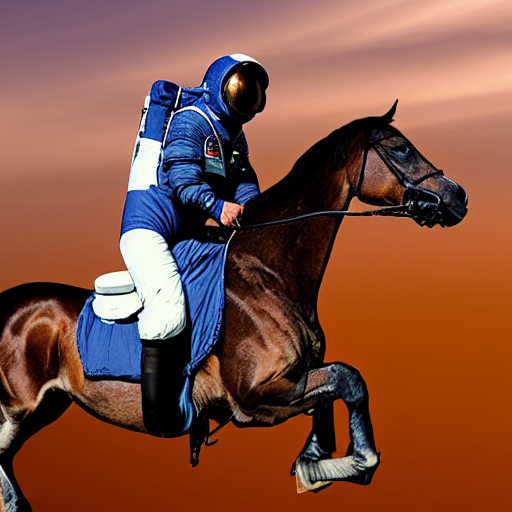

In [ ]:
image = (image / 2 + 0.5).clamp(0, 1)
image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
images = (image * 255).round().astype("uint8")
pil_images = [Image.fromarray(image) for image in images]
pil_images[0]

Ahora tenés todas las piezas para construir tus propios pipelines o usar los componentes de diffusers como prefieras 🔥.